## Problem Statement

The file `task_data.csv` contains an example data set that has been artificially generated. The set consists of 400 samples where for each sample there are 10 different sensor readings available. The samples have been divided into two classes where the class label is either 1 or -1. The class labels define to what particular class a particular sample belongs.<br>
The aim is to rank the sensors according to their importance/predictive power with respect to the class labels of the samples.<br>

## Exploratory Data Analysis

### Load and Read the dataset

Before we load the dataset, we will set up our environment by importing necessary libraries.

In [65]:
#Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#For more info on arguments of seaborn.set()
#https://seaborn.pydata.org/generated/seaborn.set.html

#Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

#Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = (8,5)
#This works as well - plt.rcParams['figure.figsize'] = 8,5
plt.rcParams['image.cmap'] = 'viridis'

import pandas as pd
import numpy as np

- Now, let's load the dataset that we will put into our `DataFrame`.
- We have a dataset on samples and their sensor readings.

In [66]:
#load the dataset
df = pd.read_csv('data/task_data.csv')

In [67]:
#Printing the shape of the dataframe
df.shape

(400, 12)

- So, we have 400 rows aka _observations_ and 12 columns aka _features_

In [68]:
#Displaying first 5 records of the dataframe
df.head()

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,sample0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,sample1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,sample2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,sample3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,sample4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
sample index    400 non-null object
class_label     400 non-null float64
sensor0         400 non-null float64
sensor1         400 non-null float64
sensor2         400 non-null float64
sensor3         400 non-null float64
sensor4         400 non-null float64
sensor5         400 non-null float64
sensor6         400 non-null float64
sensor7         400 non-null float64
sensor8         400 non-null float64
sensor9         400 non-null float64
dtypes: float64(11), object(1)
memory usage: 37.6+ KB


In [70]:
#Calculate the statistics of the dataframe
df.describe()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.000000,0.523661,0.509223,0.481238,0.509752,0.497875,0.501065,0.490480,0.482372,0.482822,0.541933
std,1.001252,0.268194,0.276878,0.287584,0.297712,0.288208,0.287634,0.289954,0.282714,0.296180,0.272490
min,-1.000000,0.007775,0.003865,0.004473,0.001466,0.000250,0.000425,0.000173,0.003322,0.003165,0.000452
25%,-1.000000,0.299792,0.283004,0.235544,0.262697,0.249369,0.269430,0.226687,0.242848,0.213626,0.321264
50%,0.000000,0.534906,0.507583,0.460241,0.510066,0.497842,0.497108,0.477341,0.463438,0.462251,0.578389
75%,1.000000,0.751887,0.727843,0.734937,0.768975,0.743401,0.738854,0.735304,0.732483,0.740542,0.768990
max,1.000000,0.999476,0.998680,0.992963,0.995119,0.999412,0.997367,0.997141,0.998230,0.996098,0.999465


By looking at the mean and max values for each of the `sensor` features, we can infer that there is no presence of outliers in the dataset which is quite good. The reason for this being the dataset isn't a real world dataset.

### Shuffle the dataset

Next, if we refer to the `df.head()` output, we observe that the dataset is neatly arranged with first 200 samples belonging to `class 1` and the next 200 sample belonging to `class -1`. Hence, we will shuffle the data.

In [71]:
#Shuffling the dataframe on its indexes
df = df.reindex(np.random.permutation(df.index))

In [72]:
df.head()

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
112,sample112,1.0,0.731444,0.017667,0.284174,0.505508,0.340966,0.385216,0.029024,0.115022,0.702844,0.815470
308,sample308,-1.0,0.094022,0.905898,0.976218,0.708907,0.430611,0.060830,0.665321,0.814324,0.459660,0.846043
7,sample7,1.0,0.714747,0.656210,0.588290,0.134370,0.861762,0.943616,0.226714,0.546324,0.688983,0.883038
233,sample233,-1.0,0.624395,0.277980,0.078425,0.917211,0.430602,0.149846,0.648310,0.259027,0.319147,0.241688
274,sample274,-1.0,0.493200,0.377386,0.004473,0.020451,0.014929,0.623497,0.546974,0.514461,0.435640,0.485384


**Observation**

- Let's dissect `df.info()` output, and take a look at the **number of non-null observations** for each feature.
- What we can see is that all the features have 400 non-null records which is equal to the number of observations in the dataframe, implies that this dataset has **no null values** present in it.
- Also, we can verify that all the features have expected data type.

### Creating new dataframe(s) for future use

We will also create new dataframes out of the original dataframe(s) which we can use for future analysis. In this case, input features are  `sensor0`-`sensor9` feature(s), while `class_label` is the target variable i.e. the thing we are trying to predict.

In [73]:
#Dropping the sample index column from the dataset
df_sans_sample_index = df.drop(['sample index'], axis = 1)
#Setting the input feature(s) dataframe
X = df.drop(['sample index', 'class_label'], axis = 1)
#Setting the target variable df
y = df['class_label']

In [74]:
#Verifying the above
df_sans_sample_index.head()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
112,1.0,0.731444,0.017667,0.284174,0.505508,0.340966,0.385216,0.029024,0.115022,0.702844,0.815470
308,-1.0,0.094022,0.905898,0.976218,0.708907,0.430611,0.060830,0.665321,0.814324,0.459660,0.846043
7,1.0,0.714747,0.656210,0.588290,0.134370,0.861762,0.943616,0.226714,0.546324,0.688983,0.883038
233,-1.0,0.624395,0.277980,0.078425,0.917211,0.430602,0.149846,0.648310,0.259027,0.319147,0.241688
274,-1.0,0.493200,0.377386,0.004473,0.020451,0.014929,0.623497,0.546974,0.514461,0.435640,0.485384


In [75]:
#Printing the first 5 records of I/P features dataframe
X.head()

,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
112,0.731444,0.017667,0.284174,0.505508,0.340966,0.385216,0.029024,0.115022,0.702844,0.815470
308,0.094022,0.905898,0.976218,0.708907,0.430611,0.060830,0.665321,0.814324,0.459660,0.846043
7,0.714747,0.656210,0.588290,0.134370,0.861762,0.943616,0.226714,0.546324,0.688983,0.883038
233,0.624395,0.277980,0.078425,0.917211,0.430602,0.149846,0.648310,0.259027,0.319147,0.241688
274,0.493200,0.377386,0.004473,0.020451,0.014929,0.623497,0.546974,0.514461,0.435640,0.485384


In [76]:
#Printing the first 5 records of target dataframe
y.head()

112    1.0
308   -1.0
7      1.0
233   -1.0
274   -1.0
Name: class_label, dtype: float64

## Data Visualization

Creating plots along with analysis of a given dataset often gives us interesting insights. 

### Histogram

The dataset we have at our disposal contains only numeric features(barring _sample index_) and hence we will try to plot histograms to see how the observations in each feature shape up.

<IPython.core.display.Javascript object>


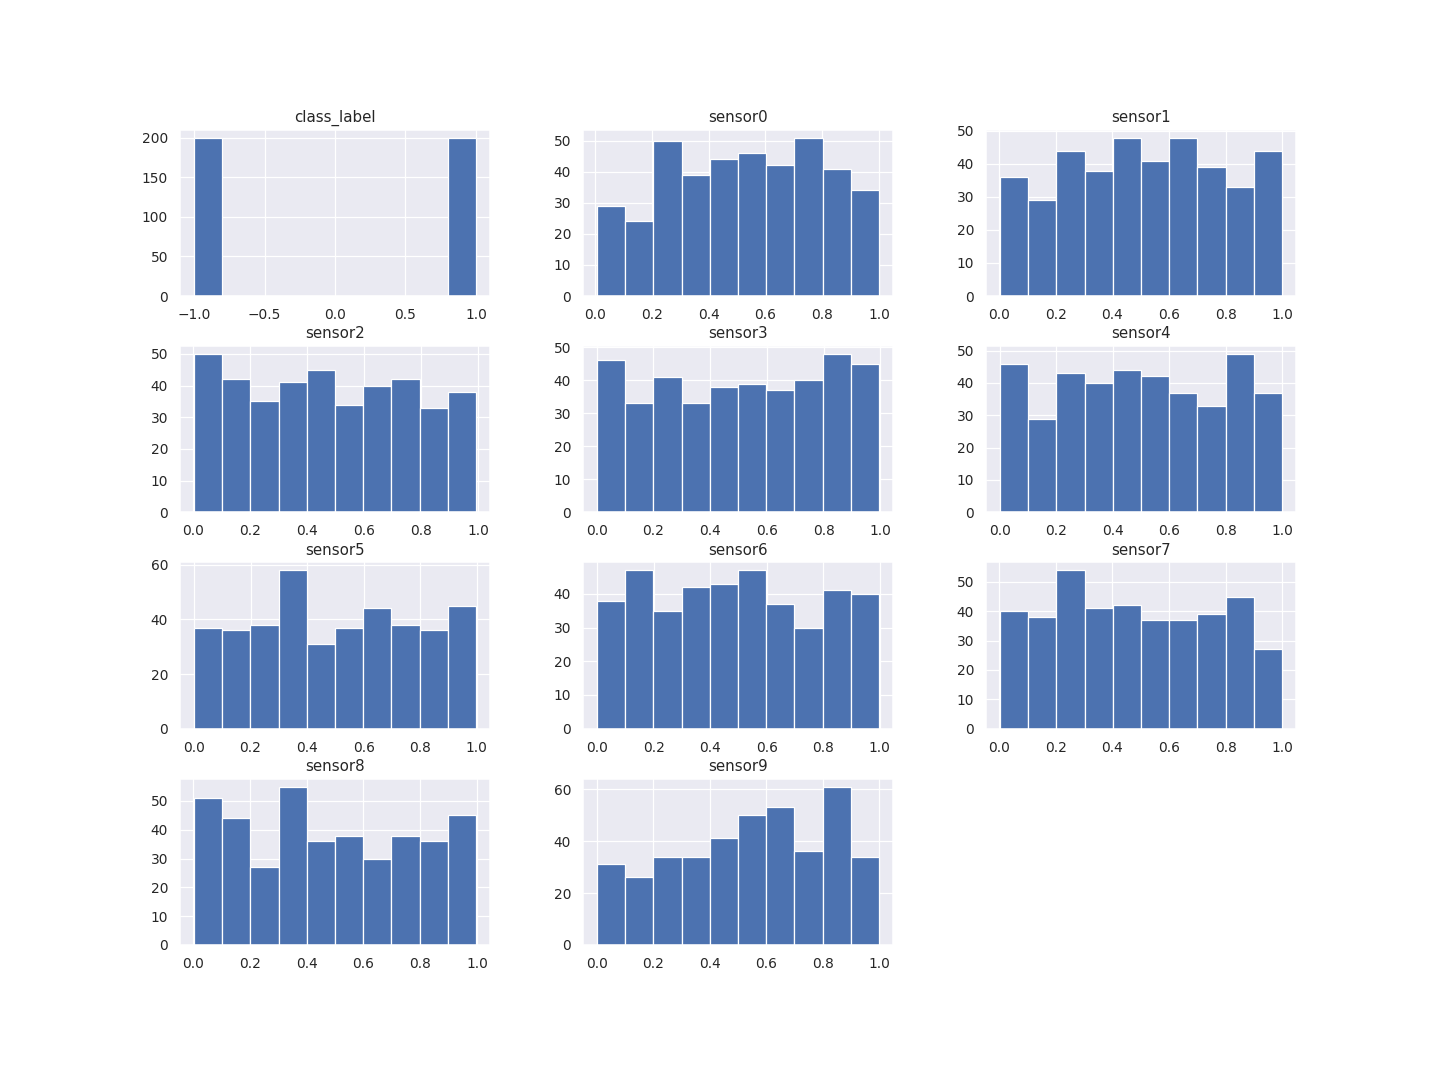

In [77]:
#Plotting histogram for the dataset
%matplotlib notebook
plt.rcParams['figure.figsize'] = (16,12)
df_sans_sample_index.hist();
plt.show()

What we can infer from the above plot is that the observations are well-distributed.(referring to the sensor features only)

### Heat map

Next we will try to find the correlation among different features in the dataset. To visualise the same, we can create a heatmap using `seaborn`.

In [78]:
#Correlation matrix
df_sans_sample_index.corr()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
class_label,1.000000,0.543295,-0.252007,0.038775,0.433636,0.607623,0.224147,-0.007414,0.175612,0.660618,0.094907
sensor0,0.543295,1.000000,-0.215668,0.019521,0.253244,0.300760,0.164243,-0.007849,0.080306,0.361751,0.001317
sensor1,-0.252007,-0.215668,1.000000,0.056042,-0.111347,-0.130463,0.055401,-0.106082,0.031513,-0.163818,-0.023655
sensor2,0.038775,0.019521,0.056042,1.000000,0.093447,-0.023486,-0.008948,-0.057090,0.006899,-0.008308,-0.058528
sensor3,0.433636,0.253244,-0.111347,0.093447,1.000000,0.295136,0.038152,-0.105005,0.001243,0.287776,0.013732
sensor4,0.607623,0.300760,-0.130463,-0.023486,0.295136,1.000000,0.183916,-0.022690,0.090186,0.378306,0.023776
sensor5,0.224147,0.164243,0.055401,-0.008948,0.038152,0.183916,1.000000,-0.061238,0.020814,0.220014,0.071258
sensor6,-0.007414,-0.007849,-0.106082,-0.057090,-0.105005,-0.022690,-0.061238,1.000000,0.065211,-0.073309,0.040744
sensor7,0.175612,0.080306,0.031513,0.006899,0.001243,0.090186,0.020814,0.065211,1.000000,0.060028,0.059341
sensor8,0.660618,0.361751,-0.163818,-0.008308,0.287776,0.378306,0.220014,-0.073309,0.060028,1.000000,-0.033991


<IPython.core.display.Javascript object>


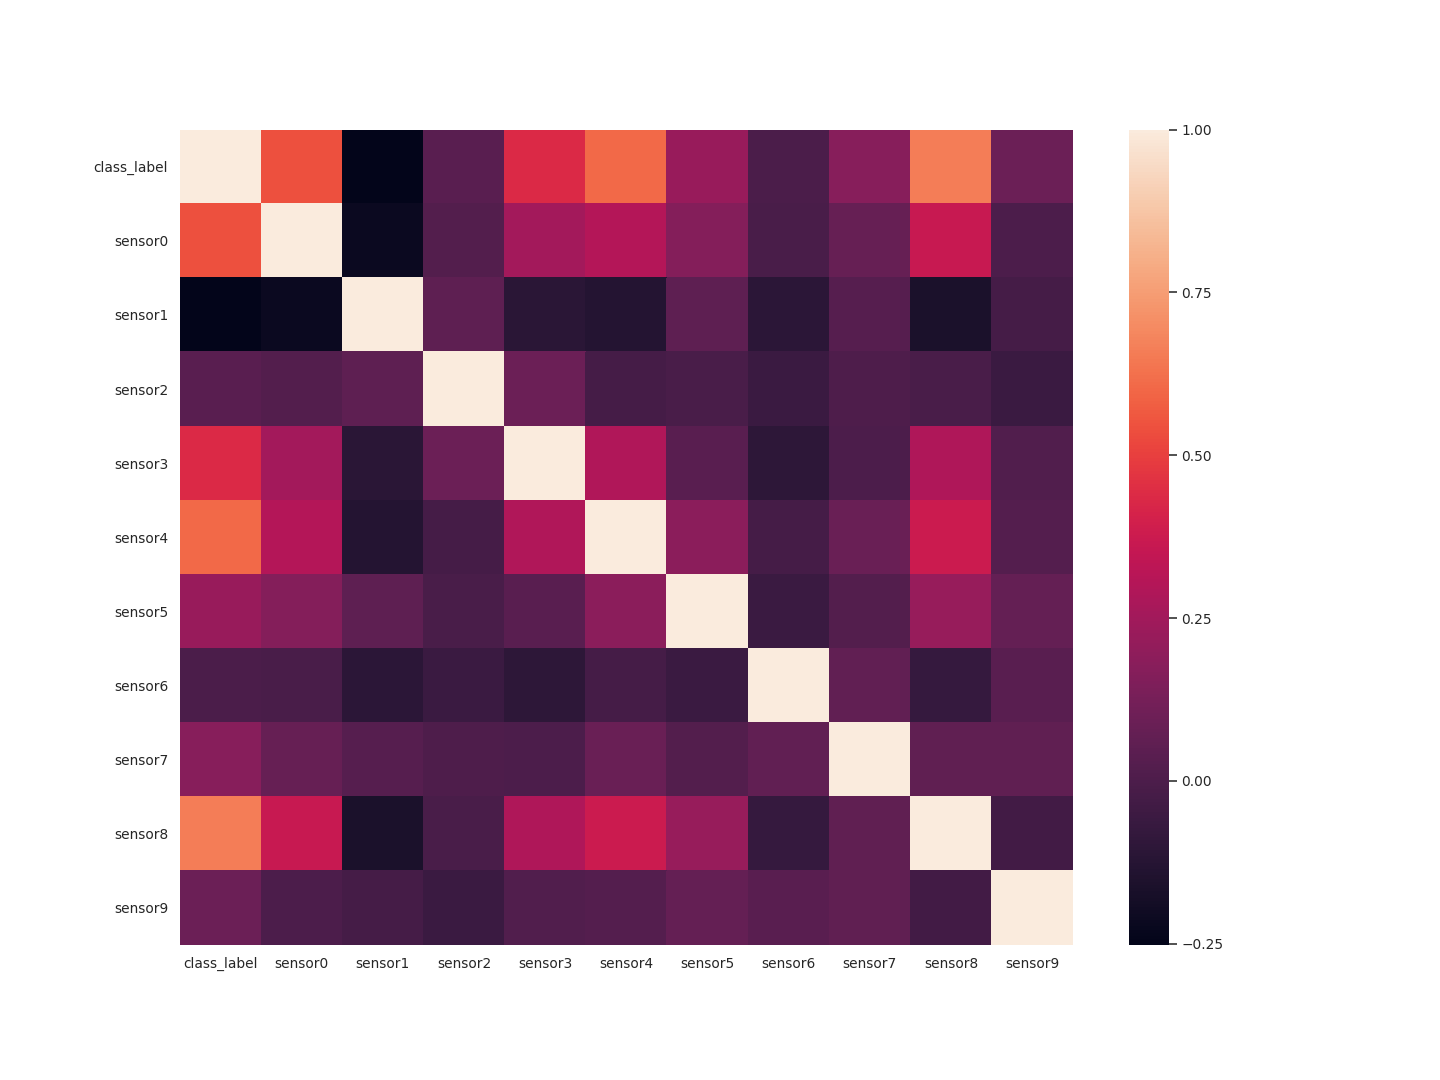

In [79]:
#Plotting heatmap
plt.rcParams['figure.figsize'] = (16,12)
sns.heatmap(df_sans_sample_index.corr());

We can annotate each cell with the numeric value.

<IPython.core.display.Javascript object>


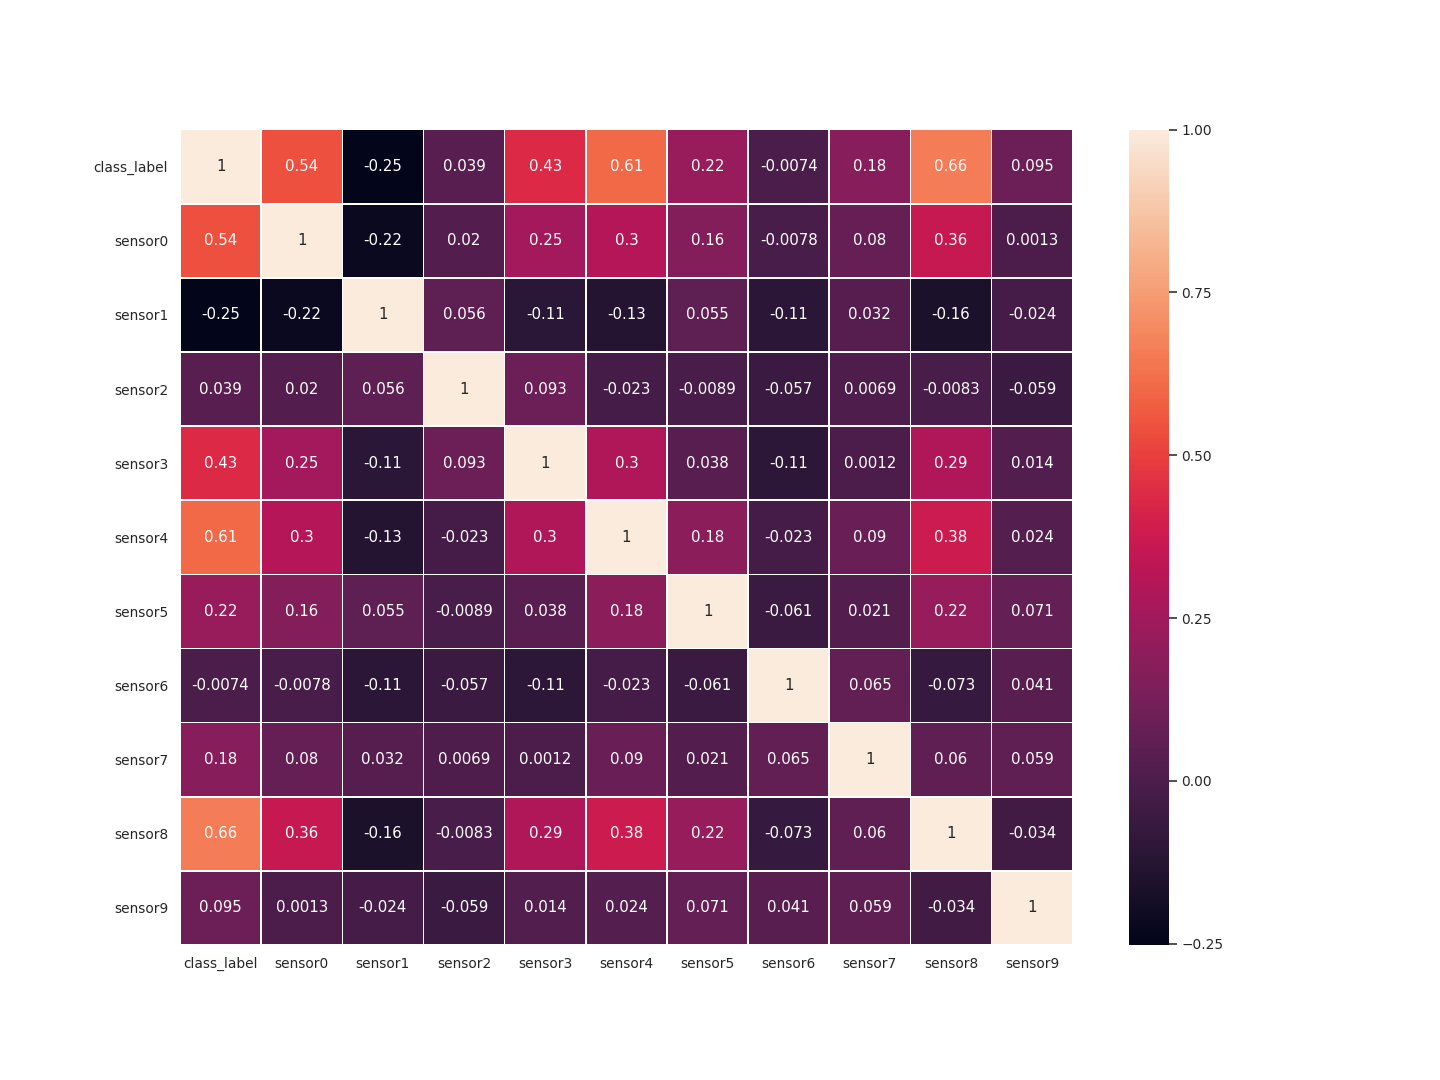

In [80]:
sns.heatmap(df_sans_sample_index.corr(), annot = True, linewidths=.5);

**Observations**
- On the main diagonal we have got perfect correlation since each feature is correlated to itself.
- The 'brighter' the cell, 'higher' the correlation.

### Box plot (with Plotly)

Earlier we printed the stats like mean, median etc using `df.describe()`. The same can be visualised by having a box plot. We will create a box plot for every sensor feature using `plotly` in order to have interactive plots. By plotting this we can confirm once again that there is **no presence of outlier** in any of the sensor feature(s).

In [81]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [82]:
#Putting all the sensor feature(s) in one list
list_of_sensors = [x for x in df.columns if 'sensor' in x]

In [83]:
#Create boxplot for the sensor feature(s)

trace0 = go.Box(
            y = df_sans_sample_index['sensor0'],
            name = 'sensor0'
            )

trace1 = go.Box(
            y = df_sans_sample_index['sensor1'],
            name = 'sensor1'
            )

trace2 = go.Box(
            y = df_sans_sample_index['sensor2'],
            name = 'sensor2'
            )

trace3 = go.Box(
            y = df_sans_sample_index['sensor3'],
            name = 'sensor3'
            )

trace4 = go.Box(
            y = df_sans_sample_index['sensor4'],
            name = 'sensor4'
            )

trace5 = go.Box(
            y = df_sans_sample_index['sensor5'],
            name = 'sensor5'
            )

trace6 = go.Box(
            y = df_sans_sample_index['sensor6'],
            name = 'sensor6'
            )

trace7 = go.Box(
            y = df_sans_sample_index['sensor7'],
            name = 'sensor7'
            )

trace8 = go.Box(
            y = df_sans_sample_index['sensor8'],
            name = 'sensor8'
            )

trace9 = go.Box(
            y = df_sans_sample_index['sensor9'],
            name = 'sensor9'
            )

#Define the data array
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9]
#Set the title
layout = {'title': 'Box plot for Sensor feature(s)'}


#Create a 'Figure' and plot it
fig = go.Figure(data = data, layout = layout)
iplot(fig, show_link=False)

### Count plot

We will now shift our focus to the target label i.e. `class_label` which according to problem statement has two values either 1 or -1.  We can see below that each class in the target feature has 200 observations associated with it.

In [84]:
df['class_label'].value_counts()

-1.0    200
 1.0    200
Name: class_label, dtype: int64

<IPython.core.display.Javascript object>


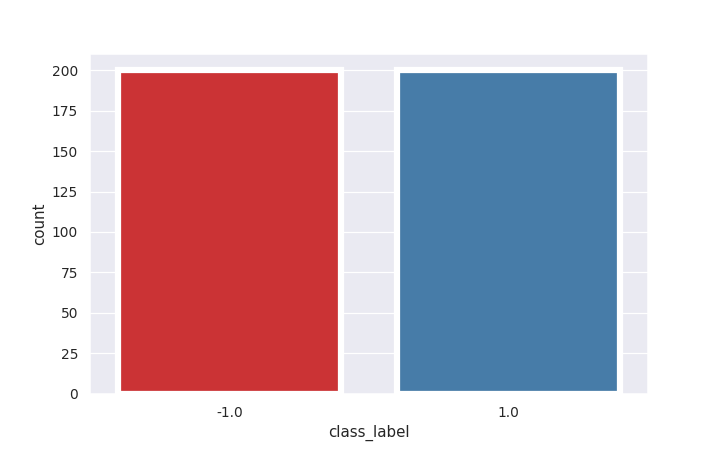

In [85]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x = 'class_label', data = df, color = 'Green, Red', linewidth = 5, palette = "Set1");

## Determining Feature Importance

Since we have analysed the dataset, it's now time to evaluate the importance of the input features which is quintessential in determining their ranking. We will discuss different approaches below,

### Correlation (with the target)

We need to assess input feature importance with respect to the target feature i.e. `class_label` because if the input features are closely related to the target variable, we can build a robust machine learning model.<br>
Since the dataset is not large, we can easily compute the standard correlation coefficient (also called Pearson’s r) of each sensor feature with respect to `class_label` using `corrwith()` method.

In [86]:
#Ranking of input features wrt target variable in terms of correlation
corrwith_rank = df_sans_sample_index.corrwith(df['class_label']).sort_values(ascending = False)
#Excluding 'class_label' since that's the target variable
print(corrwith_rank[1:])

sensor8    0.660618
sensor4    0.607623
sensor0    0.543295
sensor3    0.433636
sensor5    0.224147
sensor7    0.175612
sensor9    0.094907
sensor2    0.038775
sensor6   -0.007414
sensor1   -0.252007
dtype: float64


**Observation**

- The correlation coefficient ranges from –1 to 1. When it is close to 1, it implies that there is a strong positive correlation; for example, `sensor8`, `sensor4`. 
- When the coefficient is close to –1, it means that there is a strong negative correlation, `sensor6`, `sensor1`
- Finally, coefficients close to zero mean that there is no linear correlation, `sensor2`.
- If we refer to the heatmap we plotted earlier, the first column depicts the correlation between the input features and the target variable.
- Also, correlation is highly deceptive as it doesn’t capture strong non-linear relationships.

### Mutual Information 

Mutual Information between two variables measures the dependence of one variable to another. This is a type of `Univariate feature selection` which works by selecting the best features based on univariate statistical tests like chi2, mutual information, f_test.<br>
If Y = f(i1,i2,i3), 0 < mutual information < 1, where i1, i2, i3 are input features determining target variable.

In [87]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
#print(X.shape)
#k = 10 since we need to rank the input features and not select important features.
X_new = SelectKBest(mutual_info_classif, k=10).fit_transform(X, y)
#print(X_new.shape)
#print(X_new[:1])
mutual_rank = pd.Series(X_new[:1].flatten(), index = X.columns).sort_values(ascending = False)
print(mutual_rank)

sensor9    0.815470
sensor0    0.731444
sensor8    0.702844
sensor3    0.505508
sensor5    0.385216
sensor4    0.340966
sensor2    0.284174
sensor7    0.115022
sensor6    0.029024
sensor1    0.017667
dtype: float64


**Observation**
- **sensor7** is the most important feature as per mutual_info test almost having mutual information value close to 1.
- Similar rankings were observed when the dataset was passed through statistical tests like chi2 and f_classif.
- The advantage of using mutual information over F-Test is, it does well with the non-linear relationship between feature and target variable. Having said that, mutual information methods being nonparametric, they require more samples for accurate estimation.

### Evaluating coefficient value(or Odds Ratio) with Logistic Regression

In our dataset, we have various samples having different sensor values and belonging to either of the two class labels. Since, our target variable has two discrete classes, 1 and -1, this is a classification problem. Logistic Regression is the machine learning algorithm that deals with classification problem, especially binary classification.<br>
We will use the `coef_` parameter from the scikit-learn package to rank the features. Taking exponential of the `coef_` parameter gives us the `odds ratio` , `np.exp(logreg.coef_)` .

In [88]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)
#print(logreg.coef_)
'''
The output generated by the above code is a numpy array like below, 
[[ 2.15565381 -1.79682301  0.04357469  1.54927017  2.96937107  0.21665396
 -0.17070684  0.75360383  3.48672551  0.36793061]]
We will use np.array().flatten so as to extract values from the array
'''
or_rank_logreg = pd.Series(np.exp(logreg.coef_).flatten(), index = X.columns).sort_values(ascending = False)
print(or_rank_logreg)

sensor8    32.678766
sensor4    19.479664
sensor0     8.633533
sensor3     4.708033
sensor7     2.124643
sensor9     1.444742
sensor5     1.241914
sensor2     1.044538
sensor6     0.843069
sensor1     0.165825
dtype: float64


**Observation**
- As we can see `sensor8` is the highest ranked feature in terms of the coefficient value/odds ratio.
- Odds ratios that are greater than 1 indicate that the event is more likely to occur as the predictor increases. Odds ratios that are less than 1 indicate that the event is less likely to occur as the predictor increases.

**Insights**<br><br>
Since the dataset at our disposal contains only numeric features which are measured the same way, it is intuitive to conclude that variables with larger coefficients (weights) are more important because they contribute towards predicting a given sample belonging to a particular class.<br>
If we had features which are different in the way they are measured, say, annual pay (in Euros), age(in years), the above ranking wouldn't have given a clear picture as the values for each feature are measured on a different scale. In order to resolve this we could have standardized the coefficient(convert all the data to the same scale). Although, standardized regression coefficients do not appear to be typically employed in the logistic regression setting.<br><br>
The issue with this metric(or the odds ratio) is that all other predictors are held constant. So, one cannot really assess the overall effect. The odds ratio does not clearly consider the variation of the other predictor variables. However, since our dataset has no difference in the way sensor values are measured, it can be considered as a suitable approach.

### Recursive Feature Elimination (RFE)

The Recursive Feature Elimination (or RFE) is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. The choice of algorithm does not matter too much as long as it is skillful and consistent.<br>
The example below uses RFE with the logistic regression algorithm to select the top-most input feature in our dataset, stated by `rfe = RFE(logreg, 1)`. It is important to note that if we select top 2 features then the `fit.ranking_` would return rank 1 for top two features but since our task is to rank the input features we wil not do this.

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 1)
fit = rfe.fit(X, y)
#print("Num Features: %d" % fit.n_features_)
#print("Selected Features: %s" % fit.support_)
#print("Feature Ranking: %s" % fit.ranking_)
feature_rank_rfe = pd.Series(fit.ranking_, index = X.columns).sort_values(ascending = True)
print (feature_rank_rfe)

sensor8     1
sensor4     2
sensor0     3
sensor1     4
sensor3     5
sensor7     6
sensor9     7
sensor5     8
sensor6     9
sensor2    10
dtype: int64


**Observation**
- As seen above, **sensor8** is the most dominant feature.


### Feature Importance with Ensemble Tree Algorithms

It is easy to measure the relative importance of each feature using ensemble tree algorithms. Here, we will discuss feature importance wrt two ensemble algorithms, `Random Forest`(Bagging Ensemble of Trees) and `XgBoost`(Boosting Ensemble of Trees). The feature importance in both cases is the same: given a tree go over all the nodes of the tree and do the following,
>At each such node t, one of the input variables Xv(t) is used to partition the region associated with that node into two subregions; within each a separate constant is fit to the response values. The particular variable chosen is the one that gives maximal estimated improvement () in … risk over that for a constant fit over the entire region. The squared relative importance of variable is the sum of such squared improvements over all internal nodes for which it was chosen as the splitting variable. (_The Elements of Statistical Learning by Robert Tibshirani, Trevor Hastie_)

In case of Random Forest, Scikit-Learn measures a feature’s importance by looking at how much the tree nodes that use that feature reduce impurity on average (across all trees in the forest). More precisely, it is a weighted average, where each node’s weight is equal to the number of training samples that are associated with it.<br>
Scikit-Learn computes this score automatically for each feature post training, then it scales the results so that the sum of all importances is equal to 1. We can access the result using the `feature_importances_` variable. <br><br>

While in case of XgBoost, in additon to `feature_importances_` variable, we also have `plot_importance()` built-in function to plot features ordered by their importance.<br>
The parameter we choose to evaluate importance in `plot_importance` is crucial. The importance is calculated based on one of the following measure(s),
- Weight(default parameter) : The number of times a feature is used to split the data across all trees.
- Gain : The average training loss reduction gained when using a feature for splitting.
- Cover : The number of times a feature is used to split the data across all trees weighted by the number of training data points that go through those splits. <br>

Basically, `XGBClassifier().plot_importance` uses the
```python
Booster.get_fscore() #which uses
Booster.get_score(importance_type="weight") #by default
```
<br>

**Calculating Feature Importance Using Random Forest**

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier() #(n_estimators = 500, n_jobs = -1)
#Fit Model
rf_clf.fit(X, y)
#Calculate feature importance for each input feature 
for feature_name, score in (zip(df[list_of_sensors], rf_clf.feature_importances_)):
    print (feature_name, score)

sensor0 0.10575856587385152
sensor1 0.013205869525442436
sensor2 0.0659657543061557
sensor3 0.04992146643696265
sensor4 0.13710706179078455
sensor5 0.01664956375490159
sensor6 0.23946130029372148
sensor7 0.007039373552288467
sensor8 0.35028112600308886
sensor9 0.014609918462802792


In [113]:
#Ranking of features as per their importance
feature_rank_rf = pd.Series(rf_clf.feature_importances_, index = [list_of_sensors]).sort_values(ascending= False)
print (feature_rank_rf)

sensor8    0.350281
sensor6    0.239461
sensor4    0.137107
sensor0    0.105759
sensor2    0.065966
sensor3    0.049921
sensor5    0.016650
sensor9    0.014610
sensor1    0.013206
sensor7    0.007039
dtype: float64


<IPython.core.display.Javascript object>


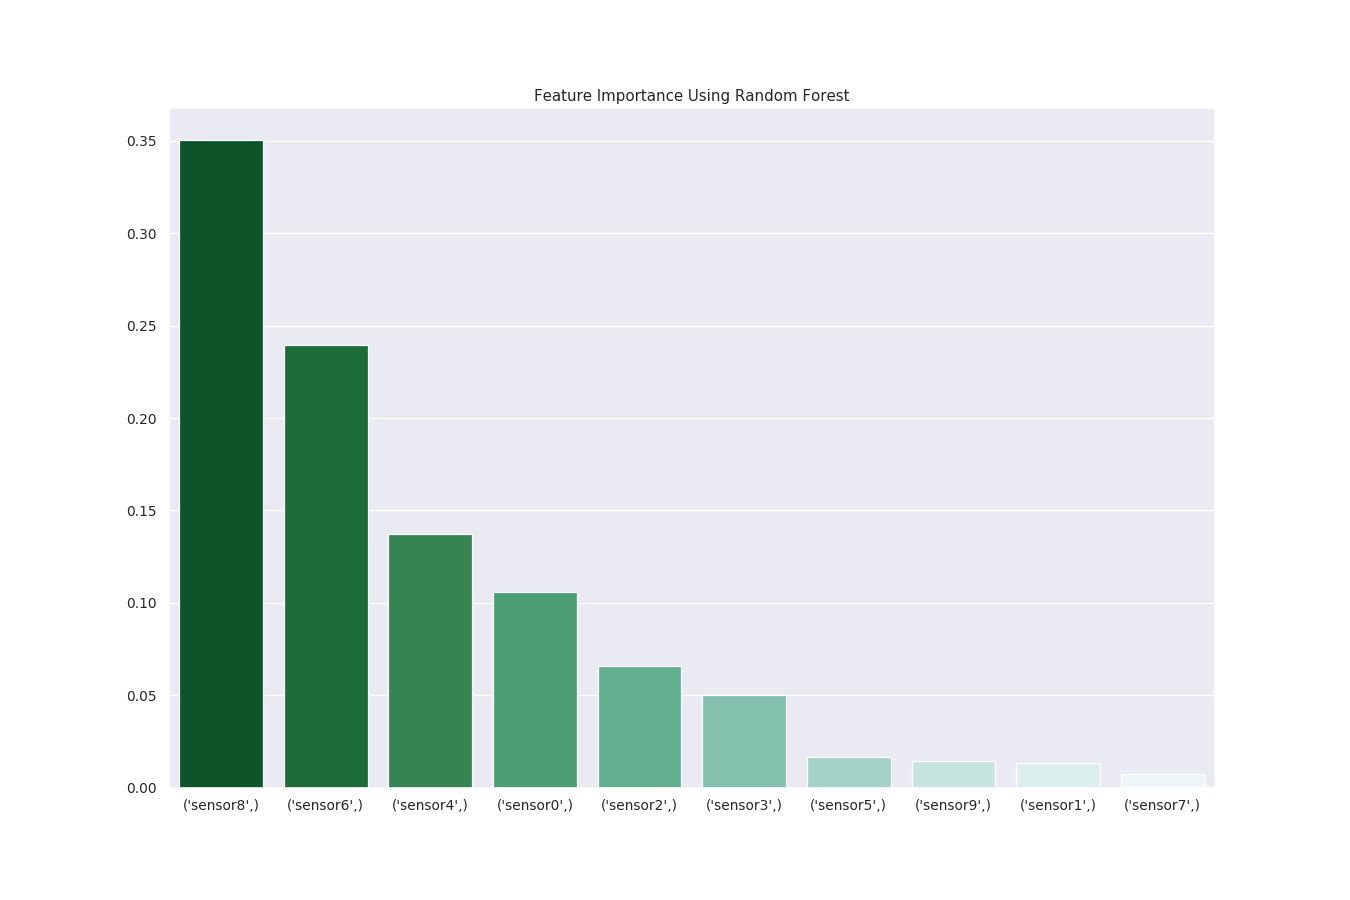

In [93]:
#Plotting the features as per their ranking
plt.rcParams['figure.figsize'] = (15,10)
sns.barplot(x = feature_rank_rf.index, y = feature_rank_rf.values, palette="BuGn_r");
plt.title('Feature Importance Using Random Forest');

**Calculating Feature Importance Using XgBoost (feature_importances_)**

In [94]:
from xgboost import XGBClassifier
xg_clf = XGBClassifier()#(n_estimators = 500, n_jobs = -1)
#Fit Model
xg_clf.fit(X, y)
#Calculate feature importance for each input feature 
for feature_name, score in (zip(df[list_of_sensors], xg_clf.feature_importances_)):
    print (feature_name, score)

sensor0 0.05087308
sensor1 0.022147927
sensor2 0.027038284
sensor3 0.0027893402
sensor4 0.088022076
sensor5 0.0
sensor6 0.13018082
sensor7 0.0
sensor8 0.6610094
sensor9 0.017939096


In [95]:
#Ranking of features as per their importance
feature_rank_xg = pd.Series(xg_clf.feature_importances_, index = [list_of_sensors]).sort_values(ascending = False)
print (feature_rank_xg)

sensor8    0.661009
sensor6    0.130181
sensor4    0.088022
sensor0    0.050873
sensor2    0.027038
sensor1    0.022148
sensor9    0.017939
sensor3    0.002789
sensor7    0.000000
sensor5    0.000000
dtype: float32


<IPython.core.display.Javascript object>


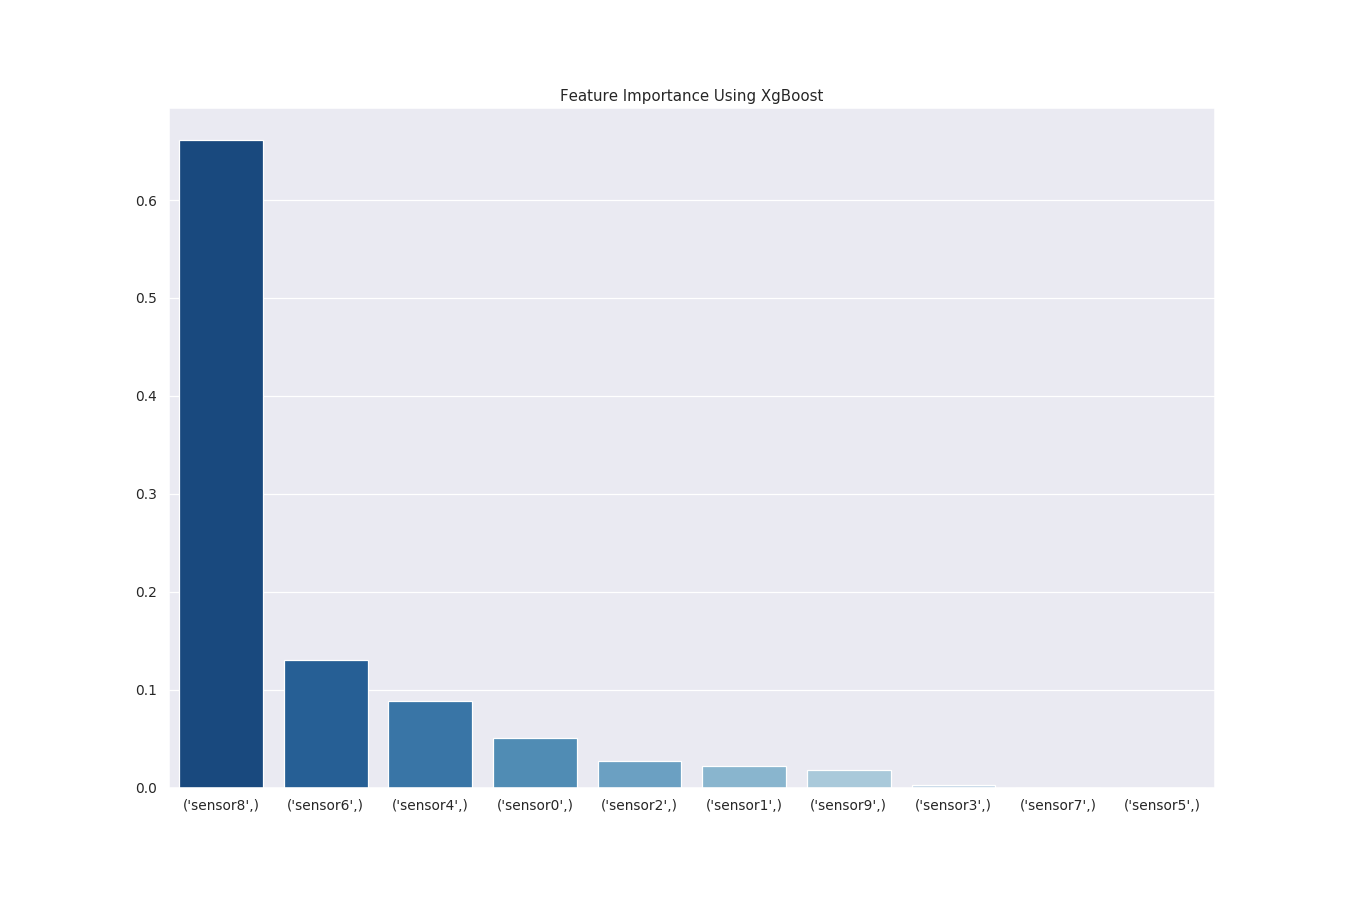

In [96]:
#Plotting the features as per their ranking
plt.rcParams['figure.figsize'] = (15,10)
sns.barplot(x = feature_rank_xg.index, y = feature_rank_xg.values, palette="Blues_r");
plt.title('Feature Importance Using XgBoost');

**Observation**
- It is quite evident from the `feature_importances_` scores calculated using both Random Forest and XgBoost models that **sensor8** is the most dominant feature while **sensor5** is the least ranked feature.
- The other thing that we can notice from both the plot(s) is that the`feature_importances_` score for _sensor8_ is quite high when using XgBoost compared to RandomForest. In other words, _sensor8_ is hands down the single most dominant feature when computed with XgBoost while in case of Random Forest _sensor8_ and _sensor4_ scores are not that different.

**Calculating Feature Importance Using XgBoost (plot_importance)**

In [97]:
#Calculating plot_importance using XgBoost
plt.rcParams['figure.figsize'] = (8,8)
from xgboost import plot_importance

<IPython.core.display.Javascript object>


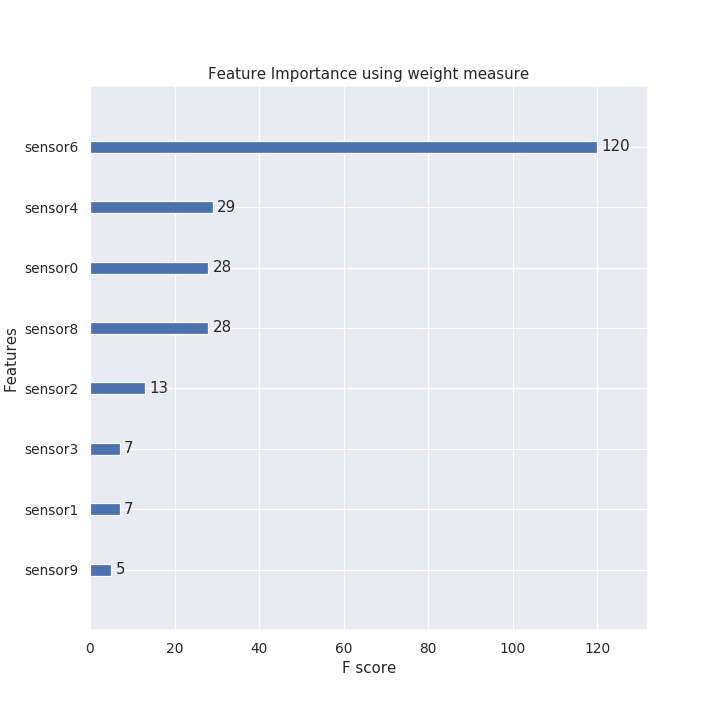

In [98]:
#Plotting importance score using 'weight' measure
plot_importance(xg_clf.fit(X, y)) 
plt.title('Feature Importance using weight measure');

<IPython.core.display.Javascript object>


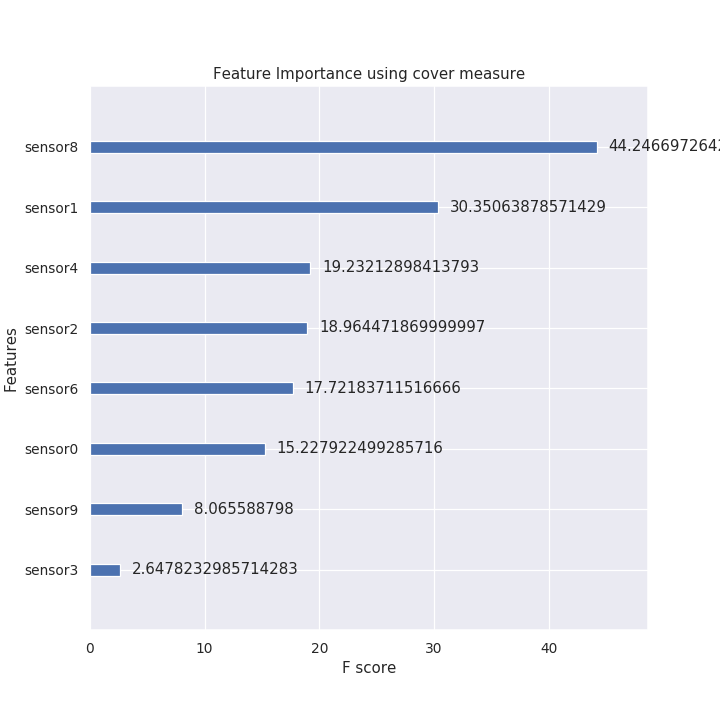

In [99]:
#Plotting importance score using 'cover' measure
plot_importance(xg_clf.fit(X, y), importance_type= 'cover')
plt.title('Feature Importance using cover measure');

<IPython.core.display.Javascript object>


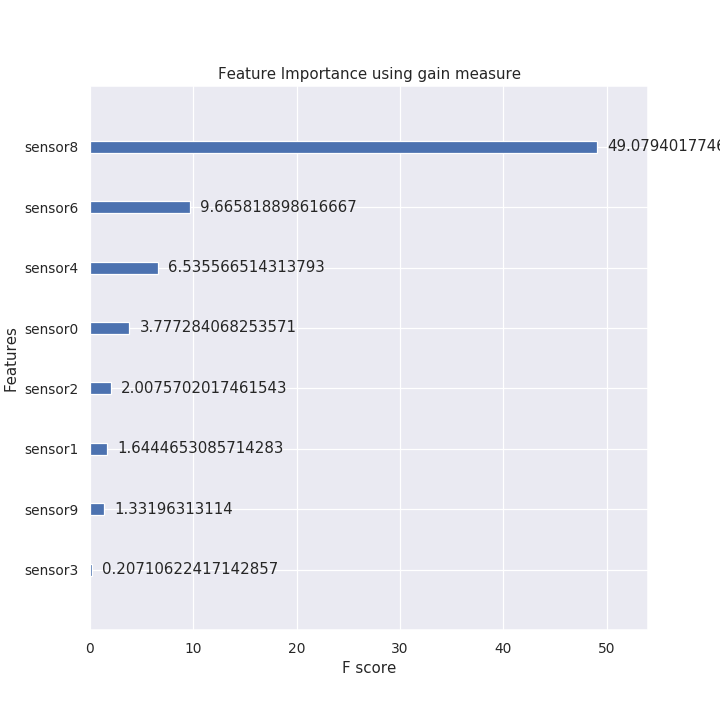

In [100]:
#Plotting importance score using 'gain' measure
plot_importance(xg_clf.fit(X, y), importance_type= 'gain')
plt.title('Feature Importance using gain measure');

In [101]:
#Calculating importance score using 'weight' measure
weight_score = xg_clf.get_booster().get_score(importance_type = 'weight')
#We will sort the dictionary generated by the above command 
#as per the weight scores and store it in a Pandas series

#Ranking of features as per their importance
weight_rank_xg = pd.Series(weight_score).sort_values(ascending = False)
print(weight_rank_xg)

sensor6    120
sensor4     29
sensor0     28
sensor8     28
sensor2     13
sensor3      7
sensor1      7
sensor9      5
dtype: int64


In [102]:
#Calculating importance score using 'cover' measure
cover_score = xg_clf.get_booster().get_score(importance_type = 'cover')

#Ranking of features as per their importance
cover_rank_xg = pd.Series(cover_score).sort_values(ascending = False)
print(cover_rank_xg)

sensor8    44.246697
sensor1    30.350639
sensor4    19.232129
sensor2    18.964472
sensor6    17.721837
sensor0    15.227922
sensor9     8.065589
sensor3     2.647823
dtype: float64


In [103]:
#Calculating importance score using 'cover' measure
gain_score = xg_clf.get_booster().get_score(importance_type = 'gain')

#Ranking of features as per their importance
gain_rank_xg = pd.Series(gain_score).sort_values(ascending = False)
print(gain_rank_xg)

sensor8    49.079402
sensor6     9.665819
sensor4     6.535567
sensor0     3.777284
sensor2     2.007570
sensor1     1.644465
sensor9     1.331963
sensor3     0.207106
dtype: float64


**Observation** 
- As we can from the above `plot_importance` plots for all the 3 different measures, the ranking of features don't match. **sensor8** is the dominant feature as per _cover_ and _gain_ measures while **sensor6** is the highest ranked feature as per _weight_ measure.

**Insights**<br><br>

As stated by Jeremy Howards and Terence in this [paper](https://explained.ai/rf-importance/), the scikit-learn Random Forest feature importance strategy is **biased**. In addition the paper states feature importance measures will only be reliable if the model is trained with suitable hyper-parameters.<br>
XgBoost models on the other hand output different ranking of the input feature based on the measure selected which makes this method arbitary. Having said that, 3 out of 4 rankings derived from XgBoost clearly shows **sensor8** is the most important feature. <br> 
Next we will look at one of the most recent and robust method i.e. SHAP to determine the importance of the input features based on their prediction power.



### SHAP (SHapley Additive exPlanations)

SHAP (SHapley Additive exPlanations) by Lundberg and Lee (2016) is a method to explain individual predictions. SHAP is based on the game theoretically optimal Shapley Values. The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction.

**What are Shapely Values?** <br><br>

A prediction can be explained by assuming that each feature value of the instance is a “player” in a game where the prediction is the payout. Shapley values – a method from coalitional game theory – tells us how to fairly distribute the “payout” among the features. The Shapley value, coined by Shapley (1953), is a method for assigning payouts to players depending on their contribution to the total payout. Players cooperate in a coalition and receive a certain profit from this cooperation.<br>
Example - We have a machine learning model to determine the mobile app used by a person. For a certain person, it predicts Whatsapp and we need to find the reasoning behind the prediction. Few of the factors that determined the prediction were gender(female), age(15) and occupation(student) of the person.
Let us assume that most common prediction was Snapchat. How much has each feature value contributed to the prediction compared to the most common prediction?<br>
The interpretation of the Shapley value is: Given the current set of feature values, the contribution of a feature value to the difference between the actual prediction and the mean(most common prediction in case of classification) is the estimated Shapley value.



Lundberg proposed TreeSHAP in 2018, a variant of SHAP for tree-based machine learning models such as decision trees, random forests and gradient boosted trees.


In [25]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

**Observation**<br><br>
Each feature value is a force that either increases or decreases the prediction. The prediction starts from the baseline. The baseline for Shapley values(given by `explainer.expected_value`) is the average of all predictions. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.<br>

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

<IPython.core.display.Javascript object>


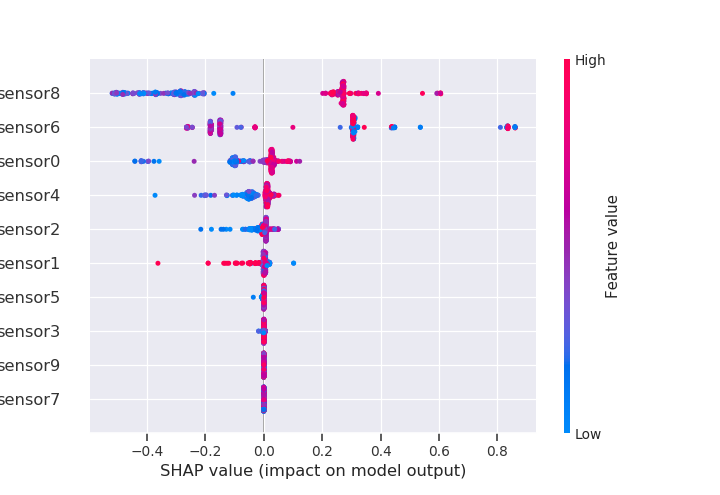

In [27]:
# summarize the effects of all the features
%matplotlib notebook
plt.rcParams['figure.figsize'] = (5,5)
shap.summary_plot(shap_values, X)

**Observation** <br><br>
The plot above sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). This reveals for example that a high value of **sensor8** maximizes the chance of the sample belonging to class 1.

Shapley values can be combined into global explanations. If we run SHAP for every instance, we get a matrix of Shapley values. This matrix has one row per data instance and one column per feature. We can interpret the entire model by analyzing the Shapley values in this matrix. The idea behind SHAP feature importance is simple: Features with large absolute Shapley values are important.<br>
We can also just take the mean absolute value of the SHAP values for each feature to get a standard bar plot.

<IPython.core.display.Javascript object>


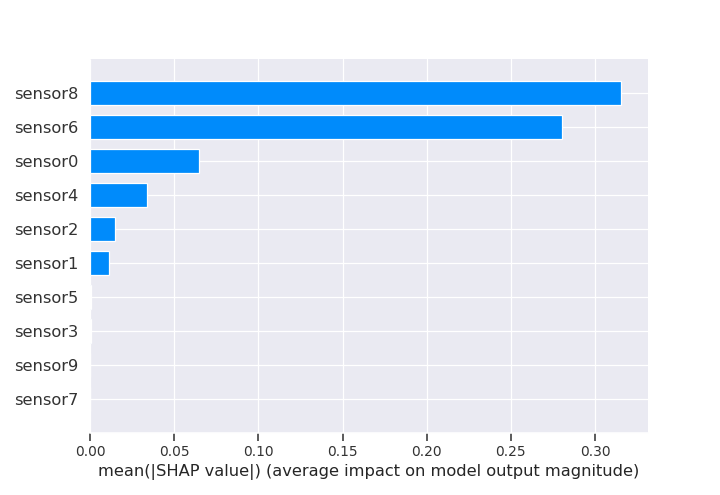

In [28]:
shap.summary_plot(shap_values, X, plot_type="bar")

**Observation**
- **sensor8** and **sensor6** are the most important features in our dataset in terms of predicting the target variable.

Let's create a new dataframe which consists of rankings of the features derived using various techniques and store it in a .csv file.

In [123]:
#Creating a dataframe to assemble rankings evaluated through various techniques
frame = {'Correlation Rank' : corrwith_rank[1:].index,
		 'Mutual Info Rank' : mutual_rank.index,
         'Odds Ratio Rank' : or_rank_logreg.index,
         'RFE Rank'	: feature_rank_rfe.index,
         'Random Forest Rank' : feature_rank_rf.index.values,
         'XGB Rank' : feature_rank_xg.index.values,
        }

rank_df1 = pd.DataFrame(frame)

frame1 = {
      	 'XGB Weight Rank' : weight_rank_xg.index,
         'XGB Cover Rank' : cover_rank_xg.index,
         'XGB Gain Rank' : gain_rank_xg.index
        }
rank_xgboost_plot = pd.DataFrame(frame1) 

rank_df = pd.concat([rank_df1, rank_xgboost_plot], axis = 1)

In [128]:
rankings = rank_df.to_csv("rankings_of_input_features.csv", index = False)

In [129]:
#Verify by reading the .csv file 
rankings_of_features = pd.read_csv('rankings_of_input_features.csv')

In [130]:
rankings_of_features.head()

,Correlation Rank,Mutual Info Rank,Odds Ratio Rank,RFE Rank,Random Forest Rank,XGB Rank,XGB Weight Rank,XGB Cover Rank,XGB Gain Rank
0,sensor8,sensor9,sensor8,sensor8,"('sensor8',)","('sensor8',)",sensor6,sensor8,sensor8
1,sensor4,sensor0,sensor4,sensor4,"('sensor6',)","('sensor6',)",sensor4,sensor1,sensor6
2,sensor0,sensor8,sensor0,sensor0,"('sensor4',)","('sensor4',)",sensor0,sensor4,sensor4
3,sensor3,sensor3,sensor3,sensor1,"('sensor0',)","('sensor0',)",sensor8,sensor2,sensor0
4,sensor5,sensor5,sensor7,sensor3,"('sensor2',)","('sensor2',)",sensor2,sensor6,sensor2


### Conclusion

The ranking of different features using correlation, other statistical tests and `feature_importance_` are different. This is expected as feature importance in tree-based models isn't based on correlation rather on feature interactions. Some features could be not important by themselves, but can have significant impact while interacting with other features.<br>
To conclude whichever approach is selected, one should feel comfortable that the end result provides a good understanding of causal relationships between explanatory variables and the resulting change in likelihoods for the dependent variable.

### Future Work

Jeremy in his [paper](https://explained.ai/rf-importance/index.html) describes an alternative to default feature importance in RF which is known as `Permutation Importance`.
I intend to explore this and see how this fares and evaluates ranking of the input features compared to other techniques.

### References 

- Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow by Aurélien Géron (O’Reilly). Copyright 2019 Aurélien Géron, 978-1-492-03264-9.<br>
- Elements of Statistical Learning Book
- https://scikit-learn.org/stable/modules/feature_selection.html
- https://forums.fast.ai/t/feature-importance-of-random-forest-vs-xgboost/17561
- https://explained.ai/rf-importance/index.html
- https://machinelearningmastery.com
- https://www.predictiveanalyticsworld.com/patimes/on-variable-importance-in-logistic-regression/9649/
- Udacity Machine Learning NanoDegree
- https://christophm.github.io/interpretable-ml-book/
- https://github.com/slundberg/shap
- https://seaborn.pydata.org/generated/seaborn.heatmap.html
- https://seaborn.pydata.org/generated/seaborn.barplot.html